In [1]:

import pandas as pd
import numpy as np
from datetime import datetime
import json

In [2]:
file = './../../Data_before_Apr_9.xls'
xls = pd.ExcelFile(file)
df = pd.read_excel(xls, sheet_name="S6603L")
print(df.head())

   activate      imei1                                           sim_info  \
0  20240812   20316612  [{"slot_index":0,"carrier_name":"USIM","mcc":"...   
1  20240816  410002477                                         uninserted   
2  20240816   20316612  [{"slot_index":0,"carrier_name":"中国移动","mcc":"...   
3  20240817   20316612  [{"slot_index":1,"carrier_name":"中国移动","mcc":"...   
4  20240819  410000851                                         uninserted   

  promotion_email  register_email        interval_date       last_boot_date  \
0             NaN            True  2024-08-12 12:05:04  2024-08-13 05:42:26   
1             NaN            True  2024-08-23 06:30:49  2024-08-23 06:30:49   
2             NaN            True  2024-08-16 09:37:24  2024-08-16 09:37:24   
3             NaN            True  2024-08-17 03:02:55  2024-08-17 03:02:55   
4             NaN            True  2024-08-19 10:00:34  2024-08-19 10:00:34   

           active_date          update_date  privacy_marketing

In [3]:
columns = df.columns
print(columns)

Index(['activate', 'imei1', 'sim_info', 'promotion_email', 'register_email',
       'interval_date', 'last_boot_date', 'active_date', 'update_date',
       'privacy_marketing', 'via_boot_wizard', 'app_usage_infos',
       'battery_info', 'bluetooth_pair_infos', 'screen_usage_info',
       'wallpaper_ids', 'interval_count', 'reboot_count', 'network_type',
       'usage_update_date', 'privacy_enchanced_device',
       'privacy_help_improve'],
      dtype='object')


In [16]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [ ]:
# Check for duplicate imei1
duplicate_devices = df['imei1'].duplicated().sum()
print(f"Number of duplicate imei1: {duplicate_devices}")

Number of duplicate devices: 107


In [17]:
# Get all rows where 'imei1' is duplicated
duplicate_rows = df[df.duplicated(subset=['imei1'], keep=False)]

# Sort by 'imei1' to group duplicates together
duplicate_rows_sorted = duplicate_rows.sort_values('imei1')

# Display duplicates (adjust display options if needed)
print(duplicate_rows_sorted)

      activate      imei1                                           sim_info  \
0     20240812   20316612  [{"slot_index":0,"carrier_name":"USIM","mcc":"...   
2     20240816   20316612  [{"slot_index":0,"carrier_name":"中国移动","mcc":"...   
3     20240817   20316612  [{"slot_index":1,"carrier_name":"中国移动","mcc":"...   
5     20240819   20316612                                         uninserted   
8     20240821   20316612  [{"slot_index":0,"carrier_name":"中国移动","mcc":"...   
...        ...        ...                                                ...   
50    20240918  410001412  [{"slot_index":0,"carrier_name":"China Mobile"...   
63    20240926  410002170                                         uninserted   
2152  20241216  410002170  [{"slot_index":0,"carrier_name":"TIGO","mcc":"...   
26    20240904  410003996                                         uninserted   
5197  20250212  410003996  [{"slot_index":0,"carrier_name":"Emergency cal...   

           promotion_email  register_em

1. Same Device, Multiple Events:
- Example: IMEI 20316612 appears 5 times (Aug 12-21, 2024) with different:
    - sim_info (switching between carriers/USIM/uninserted)
    - active_date/last_boot_date (showing ongoing usage)
- Other IMEIs (e.g., 410002170) span months (Sep 2024 - Feb 2025).

2. Patterns:
- Some devices switch SIM cards (sim_info changes).
- interval_date and update_date track when data was recorded.
- Most duplicates have register_email=True (active registrations).

3. Potential Issues:
- Rows with sim_info="uninserted" may represent SIM removal.
- Inconsistent network_type/battery_info (NaN values).

In [4]:
# Data Sheet activations: {'January': 0, 'February': 0, 'March': 0, 
#                          'April': 0, 'May': 0, 'June': 0, 'July': 195, 
#                          'August': 2227, 'September': 769, 'October': 520, 
#                          'November': 391, 'December': 0}
activate_dates = df['activate'].tolist()
emails = df['promotion_email'].tolist()
bluetooth_devices = df['bluetooth_pair_infos'].tolist()
screen_usage = df['screen_usage_info'].tolist() # can get # of times used/day or avg time used each time and each day

In [5]:
# get a list of the months devices were activated
activation_months = []
for activation in activate_dates:
    month = activation[4:6] # 4th and 5th indexes are month (yyyymmdd)
    activation_months.append(month)

# get a count for each month
month_activate_count = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for m in activation_months:
    m = int(m)
    month_activate_count[m - 1] += 1
print(month_activate_count)

[1325, 949, 984, 227, 0, 0, 0, 20, 56, 156, 973, 2281]


In [6]:
# Get the number of customers who registered an email (and total # of customers)
email_counts = []
num_emails = 0
for email in emails:
    email = str(email).lower()
    if email == 'nan':
        email_counts.append('None')
    else:
        email_counts.append(email)
        num_emails += 1

print(len(email_counts))
print(num_emails)

6971
1341


In [7]:
devices_by_user = []
num_blank = 0
total_num = 0
i = 0
for device in bluetooth_devices:
    if type(device) == str and device != 'Empty'.strip():
        dev_json = json.loads(device)
        devices_by_user.append(len(dev_json))
        total_num += 1
    else:
        num_blank += 1
        total_num += 1

# Get the avg number of paired devices, for customers who have paired a device
total_devices = 0
for num_devices in devices_by_user:
    total_devices += num_devices
avg_num_pairs = total_devices / len(devices_by_user)
print("Avg number of pairs per customer: ", avg_num_pairs)

# Get rate of customers who paired a device
print("Total Customers: ", total_num)
print("Customers who paired devices: ", len(devices_by_user))
print("Rate of customers pairing a device: ", (len(devices_by_user) / total_num) * 100, "%")


Avg number of pairs per customer:  3.3076923076923075
Total Customers:  6971
Customers who paired devices:  39
Rate of customers pairing a device:  0.5594606225792569 %


In [8]:
# Format: [{"date":1744002000000,"count":72,"time":0},{"date":1743915600000,"count":41,"time":39929}]
blank_screen_info = 0
screen_info_count = 0
avg_count_per_user = []
avg_time_per_user = []

for usage in screen_usage:
    if type(usage) == str and usage.strip() != '':
        screen_info_count += 1
        usage_json = json.loads(usage)
        
        # Get the average count and time for each instance where a user used their device
        instances = 0
        avg_count = 0
        avg_time = 0
        for instance in usage_json:
            instances += 1
            avg_count += instance['count']
            avg_time += instance['time']
        avg_count = avg_count / instances
        avg_time = avg_time / instances

        # add a user's average usage data to our list, so we can average across ALL users
        avg_count_per_user.append(avg_count)
        avg_time_per_user.append(avg_time)
    else:
        blank_screen_info += 1

# # of users we got info from
print("Users we have screen usage info from: ", screen_info_count)

# Rate of getting screen info
print("Rate of getting screen info: ", (screen_info_count / (screen_info_count + blank_screen_info)) * 100, "%")

# The average count across all users (for one instance)
count_total = 0
for val in avg_count_per_user:
    count_total += val

print("Average 'count' per instance of users: ", count_total / len(avg_count_per_user))

# The average time across all users (for one instance)
count_total = 0
for val in avg_time_per_user:
    count_total += val

print("Average 'time' per instance (in hours): ", (count_total / len(avg_time_per_user)) / 3600)

Users we have screen usage info from:  104
Rate of getting screen info:  1.491894993544685 %
Average 'count' per instance of users:  55.01041666666666
Average 'time' per instance (in hours):  4.6262591257122505


In [9]:
import matplotlib.pyplot as plt

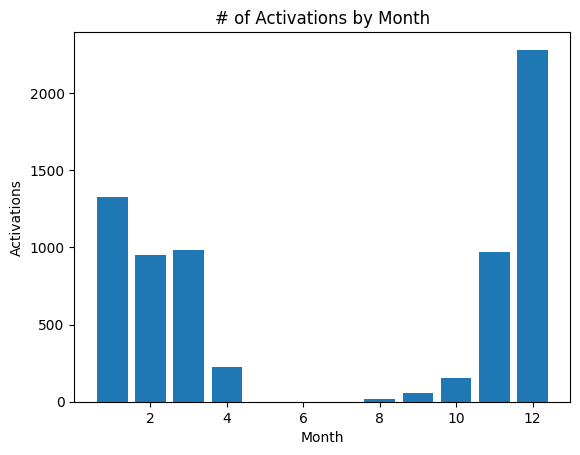

In [10]:
# Graph monthly activations
months = list(range(1, 13))
p2024 = month_activate_count[6:13]
p2025 = month_activate_count[0:6]
plt.bar(months, month_activate_count)
plt.xlabel('Month')
plt.ylabel('Activations')
plt.title('# of Activations by Month')
plt.show()


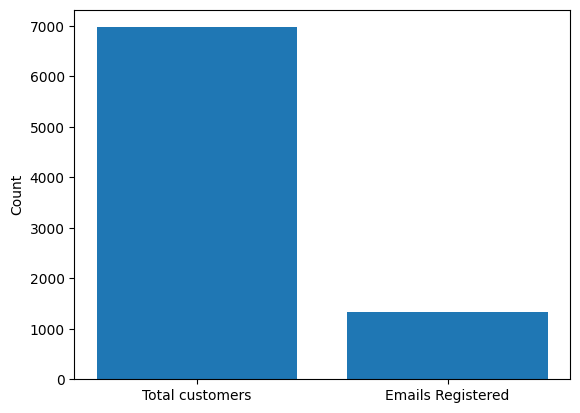

In [11]:
num_emails and len(email_counts)
plt.bar(['Total customers', 'Emails Registered'], [len(email_counts), num_emails])
plt.ylabel('Count')
plt.show()

In [12]:
print("Avg number of bluetooth paired items per customer: ", round(avg_num_pairs, 2))

Avg number of bluetooth paired items per customer:  3.31


In [13]:
# Get rate of customers who paired a device
print("Total Customers: ", total_num)
print("Customers who paired devices: ", len(devices_by_user))
print("Rate of customers pairing a device: ", (len(devices_by_user) / total_num) * 100, "%")

# # of users we got info from
print("Users we have screen usage info from: ", screen_info_count)

# Rate of getting screen info
print("Rate of getting screen info: ", (screen_info_count / (screen_info_count + blank_screen_info)) * 100, "%")

# The average count across all users (for one instance)
count_total = 0
for val in avg_count_per_user:
    count_total += val

print("Average 'count' per instance of users: ", count_total / len(avg_count_per_user))

# The average time across all users (for one instance)
count_total = 0
for val in avg_time_per_user:
    count_total += val

print("Average 'time' per instance (in hours): ", (count_total / len(avg_time_per_user)) / 3600)

Total Customers:  6971
Customers who paired devices:  39
Rate of customers pairing a device:  0.5594606225792569 %
Users we have screen usage info from:  104
Rate of getting screen info:  1.491894993544685 %
Average 'count' per instance of users:  55.01041666666666
Average 'time' per instance (in hours):  4.6262591257122505
